# Investment Assignment

## Checkpoint1: Data Cleaning
### Step 1: Load the data from files companies and round2 in a dataframe using pandas

In [535]:
#Import the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')
# set seaborn theme if you prefer
sns.set(style="white")


In [536]:
#read the rounds2 file
#os.getcwd()
#round2_df = pd.read_csv("rounds2.csv",encoding="unicode_escape")
round2_df = pd.read_csv("rounds2.csv",encoding='latin1')
round2_df["company_permalink"] = [str(i).lower() for i in round2_df['company_permalink']]
round2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [537]:
#read the companies file
#companies_df = pd.read_csv("companies.txt",sep="\t", lineterminator="\r",encoding="unicode_escape")
companies_df = pd.read_csv("companies.txt",sep="\t",encoding='latin1')
companies_df["permalink"] = [str(i).lower() for i in companies_df['permalink']]
#companies_df[companies_df['permalink']=="/organization/004-technologies"]  
#companies_df.describe()

## Table 1.1 Understand the dataset
### 1. Finding the count of unique companies in round2 dataframe

 - We will be using value_counts to identify the count of unique values of column permalink
 - Check if there are any null values first
 - Then count the uniques values using values_count method

In [538]:
# all values are false indicating no null values
(round2_df["company_permalink"]).isnull().values.any()
len(round2_df["company_permalink"].unique())

66370

In [539]:
len(round2_df["company_permalink"].value_counts())

66370

### Observation and conclusion:
 - round2 dataframe has __no null values__
 - round2 dataframe has total __66370 unique values__

### 2. Finding the count of unique companies in companies dataframe

 - We will be using value_counts to identify the count of unique values of column permalink
 - Check if there are any null values first
 - Then count the uniques values using values_count method

In [540]:
#Check if there are any null values
(companies_df["name"]).isnull().values.any() 

True

In [541]:
# How many null values. There are only two null values so we can safely remove them
companies_df[companies_df["name"].isnull()] 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [542]:
#drop null values from the companies dataframe
companies_df.dropna(subset=["name"],inplace=True)

In [543]:
#
(companies_df["name"]).isnull().values.any()

False

In [544]:
#Check the count of unique values in companies dataframe
len(companies_df["name"].unique())

66102

### Observation and Conclusion
 - Companies dataframe has __two null values__
 - companies dataframe has total __66103 unique values__

### 3. Which companies dataframe column can be unique column

__permalink__ column can be unique column for companies dataframe

In [545]:
round2_df['company_permalink'].equals(companies_df['name'])

False

### Observation and Conclusion
- __The two dataframes have companies which are not same as the result of the equal operand is false above__

### 4. Merging companies_df and rounds2_df into new dataframe master_frame
 - Named the merged dataset as __master_frame__
 - Calculate the __number of observations__

In [546]:
master_frame = pd.merge(companies_df,round2_df,how="inner",left_on="permalink",right_on="company_permalink")
master_frame['raised_amount_usd'].dropna(inplace=True)
len(master_frame["permalink"])

114941

### Observation and Conclusion
- __There are 114941 records in the merged dataframe__

## Checkpoint2: Funding Type Analysis


In [547]:

def highlight_max(data, color='blue'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
#master_frame.style.format("{:.2%}")
master_frame.style.apply(highlight_max, color='darkorange', axis=None)
mf_describe_df = master_frame.groupby("funding_round_type").describe()
mf_describe_df['funding_round_type'] = mf_describe_df.index
mf_describe_df


raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4860.0  9.586945e+05  7.404397e+06      0.0   
convertible_note                 1447.0  1.453439e+06  8.043846e+06      0.0   
debt_financing                   6682.0  1.704353e+07  2.803204e+08      0.0   
equity_crowdfunding              1228.0  5.383682e+05  1.719329e+06      0.0   
grant                            2124.0  4.300576e+06  2.558742e+07      0.0   
non_equity_assistance              73.0  4.112031e+05  1.771747e+06      0.0   
post_ipo_debt                     152.0  1.687046e+08  6.024738e+08  70000.0   
post_ipo_equity                   628.0  8.218249e+07  4.691889e+08     77.0   
private_equity                   1936.0  7.330859e+07  1.981135e+08      0.0   
product_crowdfunding              386.0  1.363131e+06  4.698380e+06      0.0   
secondary_market                   30.0  7.964963e+07  1.401038e+08   2323.0   
seed                            23601.0  7.198091e+05  2.221815e+06      0.0   
undisclosed                      1582.0  1.924237e+07  1.993238e+08      0.0   
venture                         50228.0  1.174895e+07  8.635207e+07      0.0   

                                                                         \
                              25%         50%         75%           max   
funding_round_type                                                        
angel                   150000.00    400000.0   1000000.0  4.945120e+08   
convertible_note         78847.50    272000.0   1000000.0  1.850483e+08   
debt_financing          330484.25   1100000.0   4000000.0  2.127194e+10   
equity_crowdfunding       7000.00    100000.0    395901.0  2.740000e+07   
grant                    50000.00    201684.0   1700000.0  7.500000e+08   
non_equity_assistance    25000.00     60000.0    125000.0  1.500000e+07   
post_ipo_debt          4000000.00  19950000.0  60000000.0  5.800000e+09   
post_ipo_equity        3764794.00  12262852.5  40000000.0  1.066494e+10   
private_equity         5000000.00  20000000.0  75000000.0  4.745460e+09   
product_crowdfunding     40241.75    183915.0    735000.0  5.200000e+07   
secondary_market       5025000.00  32600000.0  84475000.0  6.806116e+08   
seed                     55000.00    275000.0   1000000.0  2.000000e+08   
undisclosed             220000.00   1018680.0   4848804.0  5.000000e+09   
venture                1600901.75   5000000.0  12000000.0  1.760000e+10   

                          funding_round_type  
                                              
funding_round_type                            
angel                                  angel  
convertible_note            convertible_note  
debt_financing                debt_financing  
equity_crowdfunding      equity_crowdfunding  
grant                                  grant  
non_equity_assistance  non_equity_assistance  
post_ipo_debt                  post_ipo_debt  
post_ipo_equity              post_ipo_equity  
private_equity                private_equity  
product_crowdfunding    product_crowdfunding  
secondary_market            secondary_market  
seed                                    seed  
undisclosed                      undisclosed  
venture                              venture

In [549]:
global_fund_investment = master_frame.query('funding_round_type == "venture" or funding_round_type == "seed" or funding_round_type == "private_equity"')['raised_amount_usd'].sum()
global_fund_investment


749039866577.0

### Observation and Conclusion

 - Below are the details for each funding

 
 | Funding Type   | Average Funding million dollar |
 | -------------- | -------------------------------|
 |     Angel      |            0.959               |
 |     Seed       |            0.720               |
 |     Venture    |            11.75               | 
 | Private Equity |            73.3                |   
 
  - Since Spark Funds has to __invest between 5 to 15 million dollars__, the best funding round to invest will be
    __Venture funding round type__

## Checkpoint 3: Country Analysis

In [550]:
group_df = master_frame.groupby('country_code').agg({'raised_amount_usd':sum})
# for k,pg in group_df:
#     print('key=',str(k))
#     print(pg)
top_9 = group_df.apply(lambda x: x.sort_values(ascending=False).head(9))
top_9['country_code'] = top_9.index
#top_9 contains top 9 countries with investment amount
top_9

,raised_amount_usd,country_code
country_code,,
USA,6.694821e+11,USA
CHN,7.570357e+10,CHN
GBR,3.276705e+10,GBR
IND,2.768634e+10,IND
CAN,1.842468e+10,CAN
RUS,1.127912e+10,RUS
DEU,1.001776e+10,DEU
ISR,9.713885e+09,ISR
FRA,9.059771e+09,FRA


#### Getting data from wiki pages
 - Take first two tables where English speaking countries are mentioned

In [551]:
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
webpage = requests.get(url).text

def get_rows(rows):
    row_lst = []
    for row in rows:
        cols = row.find_all('td')
        cols = [x.text.strip() for x in cols]
        row_lst.append(cols)
        # print(type(cols))
        #print(cols)
    return row_lst
bs = BeautifulSoup(webpage, "lxml")
#take the first two tables as they have english speaking countires list
table_body = bs.select('table')[0]
rows = table_body.find_all('tr')
df = pd.DataFrame(get_rows(rows),
                   columns=['No', 'Country', 'Code', 'Region', 'Population', "Primary Language"])
df.reindex(columns=['No', 'Country', 'Code', 'Region', 'Population', "Primary Language"])
df.dropna([0],inplace = True)
df["Country"] = df["Country"].str.split('[').str[0]
df

,No,Country,Code,Region,Population,Primary Language
1,1,Australia,AUS,Oceania,"25,019,600",Yes
2,2,New Zealand,NZL,Oceania,"4,893,830",Yes
3,3,United Kingdom,GBR,Europe,"66,040,229",Yes
4,4,United States,USA,North America/Oceania,"325,719,178",Yes


In [552]:
rows = table_body2.find_all("tr")
df1 = pd.DataFrame(get_rows(rows),
                  columns=['No', 'Country', 'Code', 'Region', 'Population', "Primary Language"])
df1.reindex(columns=['No', 'Country', 'Code', 'Region', 'Population', "Primary Language"])
df1.dropna([0],inplace = True)
df1["Country"] = df1["Country"].str.split('[').str[0]
frames = [df,df1]
country_df = pd.concat(frames)
country_df.reset_index(drop=True, inplace=True)
country_df

,No,Country,Code,Region,Population,Primary Language
0,1,Australia,AUS,Oceania,"25,019,600",Yes
1,2,New Zealand,NZL,Oceania,"4,893,830",Yes
2,3,United Kingdom,GBR,Europe,"66,040,229",Yes
3,4,United States,USA,North America/Oceania,"325,719,178",Yes
4,1,Antigua and Barbuda,ATG,Caribbean,"85,000",Yes
5,2,Bahamas,BHS,Caribbean,"331,000",Yes
6,3,Barbados,BRB,Caribbean,"294,000",Yes
7,4,Belize,BLZ,Central America,"288,000",Yes
8,5,Botswana,BWA,Africa,"1,882,000",No
9,6,Burundi,BDI,Africa,"10,114,505",No


In [553]:
english_countries_df = country_df[ country_df['Primary Language'].str.startswith('Yes')]
english_countries_df
#set the index of the dataframe properly
english_countries_df['No'] = english_countries_df.index
#english_countries_df

#This will give us only three english speaking countries.
english_speaking_3_df = top_9.loc[top_9['country_code'].isin(english_countries_df['Code'])]
english_speaking_3_df.sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,country_code
country_code,,
USA,6.694821e+11,USA
GBR,3.276705e+10,GBR
CAN,1.842468e+10,CAN


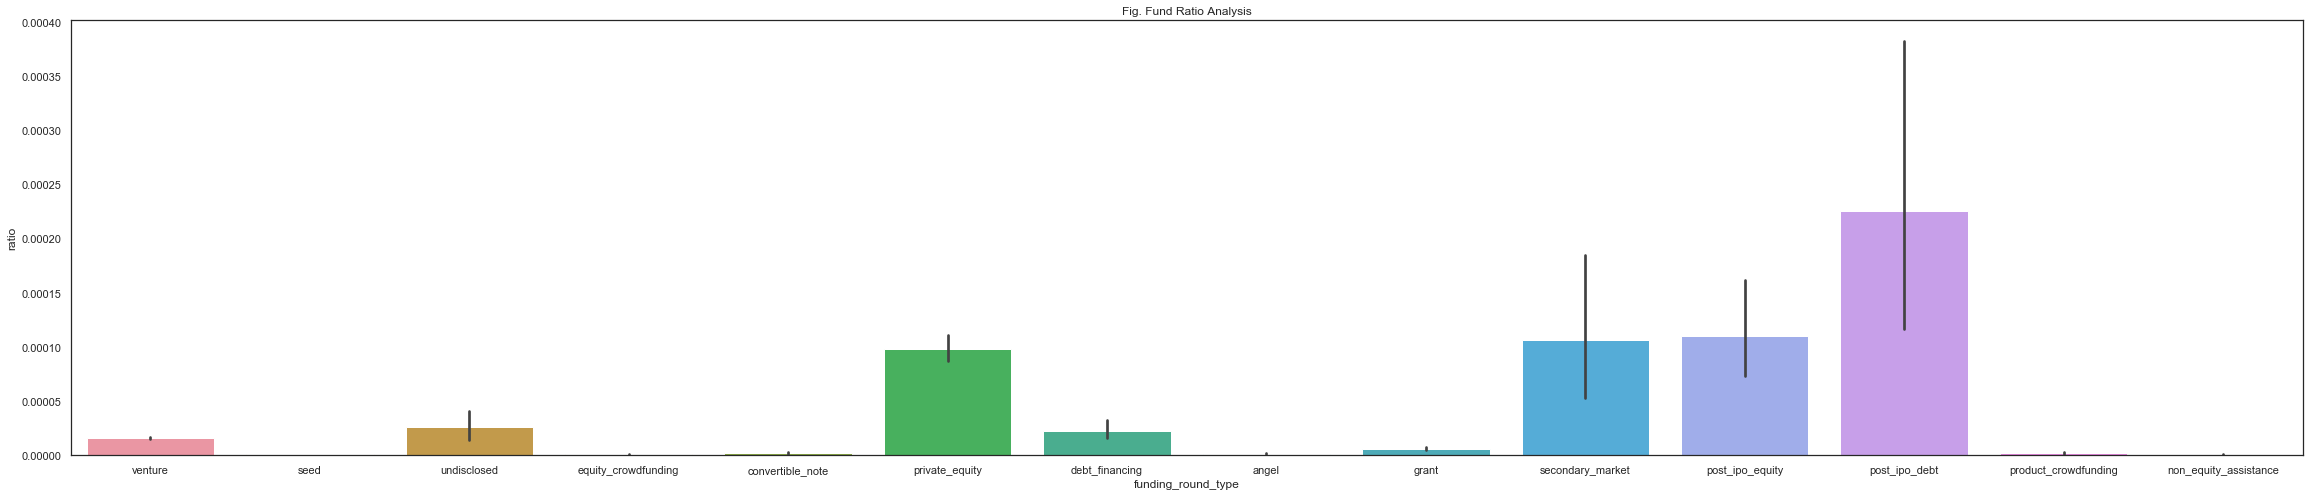

In [556]:
master_frame['ratio'] = master_frame['raised_amount_usd']/global_fund_investment
plt.figure(figsize=(40, 8))
sns.barplot(x='funding_round_type', y='ratio', data=master_frame).set_title("Fig. Fund Ratio Analysis")
plt.show()

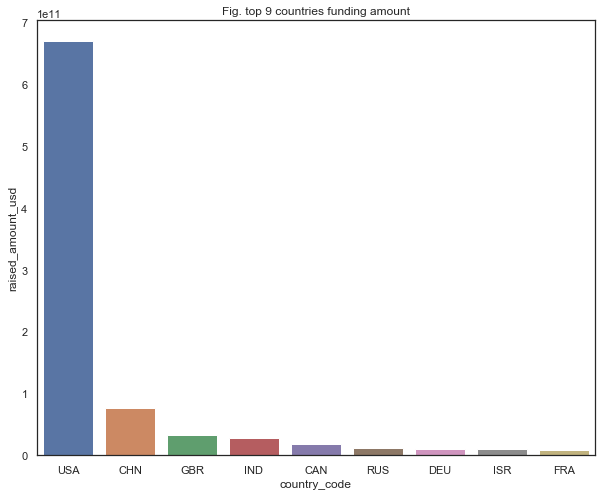

In [466]:

#top_9.plot.bar(x='country_code',y='raised_amount_usd')
#df.plot.bar(x='lab', y='val', rot=0)

# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.barplot(x='country_code', y='raised_amount_usd', data=top_9).set_title("Fig. top 9 countries funding amount")

plt.show()

### Observation and Conclusion

 - Below are the top __3 English speaking countries__.
 - China,though in top 3, is not a primarily english speaking country.
 - India is not a primarily english speaking country
 
 

  |  Rank  | Country |
 | -------------- | -------------------------------|
 |     Top English speaking country      |            USA United States of America               |
 |     Second English speaking country       |            GBR Great Britain               |
 |     Third English speaking country    |            CAN Canada               | 

## Checkpoint 4: Sector Analysis 1

 - Map each sub-sector in the master dataframe with the main sector in the mapping dataset

In [560]:
# clean the category list with the right category. For categories separated by pipe, the first one should be taken
master_frame['category_list'] = master_frame['category_list'].str.split("|").str[0]
#master_frame

#import the mapping file into a dataframe
mapping_df = pd.read_csv("mapping.csv",encoding='latin1')
#mapping_df.set_index('category_list',inplace=True)
#mapping_df = mapping_df.T


#category_list_df = pd.DataFrame(master_frame['category_list'])
master_frame['main_sector'] = pd.Series()

main_sector_list = list(mapping_df.columns)

main_sector_list = main_sector_list[1:]
#main_sector_list[2]

automotive_sports_df = mapping_df.loc[mapping_df[main_sector_list[0]].isin([1])]
blank_df = mapping_df.loc[mapping_df[main_sector_list[1]].isin([1])]
cleantech_sem_df = mapping_df.loc[mapping_df[main_sector_list[2]].isin([1])]
entertainment_df = mapping_df.loc[mapping_df[main_sector_list[3]].isin([1])]
health_df = mapping_df.loc[mapping_df[main_sector_list[4]].isin([1])]
manufacturing_df = mapping_df.loc[mapping_df[main_sector_list[5]].isin([1])]
news_df = mapping_df.loc[mapping_df[main_sector_list[6]].isin([1])]
others_df = mapping_df.loc[mapping_df[main_sector_list[7]].isin([1])]
sfaa_df = mapping_df.loc[mapping_df[main_sector_list[8]].isin([1])]


automotive_sports_df['category_list']
automotive_sports_df.loc[:, (automotive_sports_df != 0).any(axis=0)]

blank_df['category_list']
blank_df.loc[:, (blank_df != 0).any(axis=0)]


cleantech_sem_df['category_list']
cleantech_sem_df.loc[:, (cleantech_sem_df != 0).any(axis=0)]

entertainment_df['category_list']
entertainment_df.loc[:, (entertainment_df != 0).any(axis=0)]

health_df['category_list']
health_df.loc[:, (health_df != 0).any(axis=0)]


manufacturing_df['category_list']
manufacturing_df.loc[:, (manufacturing_df != 0).any(axis=0)]


news_df['category_list']
news_df.loc[:, (news_df != 0).any(axis=0)]


others_df['category_list']
others_df.loc[:, (others_df != 0).any(axis=0)]

sfaa_df['category_list']
sfaa_df.loc[:, (sfaa_df != 0).any(axis=0)]


def check_all_cases(row):
    if row['category_list'] in automotive_sports_df['category_list'].values:
        return "Automative & Sports"
    elif row['category_list'] in blank_df['category_list'].values:
        return "Blank"
    elif row['category_list'] in cleantech_sem_df['category_list'].values:
        return "Cleantech / Semiconductors"
    elif row['category_list'] in entertainment_df['category_list'].values:
        return "Entertainment"
    elif row['category_list'] in health_df['category_list'].values:
        return "Health"
    elif row['category_list'] in manufacturing_df['category_list'].values:
        return "Manufacturing" 
    elif row['category_list'] in news_df['category_list'].values:
        return "News, Search and Messaging" 
    elif row['category_list'] in others_df['category_list'].values:
        return "Others"
    elif row['category_list'] in sfaa_df['category_list'].values:
        return "Social, Finance, Analytics, Advertising"
   

    
#category_list_df['sector'] = category_list_df.apply(check_automotive,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_cleantech_semiconductor,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_entertainment,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_health,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_manufacturing,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_news,axis=1)

master_frame['main_sector'] = master_frame.apply(check_all_cases,axis=1)
#category_list_df['sector'] = category_list_df.apply(check_others,axis=1)
master_frame['category_list'].dropna(inplace=True)
master_frame



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,1.335042e-05,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,9.345297e-07,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,4.548327e-06,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.670085e-06,"News, Search and Messaging"
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,NaN,Others
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,5.507050e-08,Entertainment
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,5.788744e-08,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,9.605510e-07,Cleantech / Semiconductors
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,4.005127e-06,None


### Observation and Conclusion

 - The mergining of main sector and sub-sector is achieved in the dataframe category_list_df above



## Checkpoint 5 : Sector Analysis 2

### Objectives
 -  Create three dataframes for each top english speaking country by investment
 - 

In [561]:
#df = df[pd.notnull(df['EPS'])]
usa_df = master_frame[(master_frame['country_code'] == 'USA')]
usa_df = usa_df[pd.notnull((usa_df['raised_amount_usd']))]

#Total no of investments
usa_df['permalink'].count()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,1.335042e-05,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,9.345297e-07,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,4.548327e-06,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.670085e-06,"News, Search and Messaging"
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,NaN,Others
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,5.507050e-08,Entertainment
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,5.788744e-08,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,9.605510e-07,Cleantech / Semiconductors
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,4.005127e-06,None


In [522]:
#Total amount of investment in billions
usa_df['raised_amount_usd'].sum()/1000000000

669.482098821

In [523]:
# top sectors investment wise
(usa_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False))

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio
main_sector,,,,,,,,,,,,,,,,,
Others,13754,13754,13091,13754,13754,13754,13747,13740,13740,11927,13754,13754,13754,4396,13754,13754,13754
Cleantech / Semiconductors,11438,11438,10834,11438,11438,11438,11436,11432,11432,9037,11438,11438,11438,3735,11438,11438,11438
"Social, Finance, Analytics, Advertising",9849,9849,9596,9849,9849,9849,9844,9832,9832,9085,9849,9849,9849,3363,9849,9849,9849
"News, Search and Messaging",7999,7999,7814,7999,7999,7999,7989,7980,7980,7197,7999,7999,7999,2679,7999,7999,7999
Health,5378,5378,5044,5378,5378,5378,5375,5367,5367,4200,5378,5378,5378,1384,5378,5378,5378
Manufacturing,4063,4063,3837,4063,4063,4063,4059,4056,4056,3410,4063,4063,4063,1143,4063,4063,4063
Entertainment,3563,3563,3412,3563,3563,3563,3559,3550,3550,3176,3563,3563,3563,1102,3563,3563,3563
Automative & Sports,1101,1101,1039,1101,1101,1101,1101,1100,1100,947,1101,1101,1101,276,1101,1101,1101


In [524]:
 (usa_df.groupby('name').agg({'raised_amount_usd':sum})).apply(lambda x: x.sort_values(ascending=False).head(5))

,raised_amount_usd
name,
Verizon Communications,3.007950e+10
Freescale Semiconductor,1.760000e+10
Uber,8.207450e+09
Clearwire,5.820000e+09
Charter Communications,5.162513e+09


In [526]:
gbr_df = master_frame[(master_frame['country_code'] == 'GBR')]
gbr_df = gbr_df[pd.notnull((gbr_df['raised_amount_usd']))]

#Total no of investments
gbr_df['permalink'].count()

5019

In [527]:
#Total amount of investment in billions
gbr_df['raised_amount_usd'].sum()/1000000000

32.76704806

In [529]:
# top sectors investment wise
(gbr_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False))

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio
main_sector,,,,,,,,,,,,,,,,,
Others,1143,1143,1111,1143,1143,1143,1117,1088,1088,953,1143,1143,1143,228,1143,1143,1143
"Social, Finance, Analytics, Advertising",962,962,949,962,962,962,952,939,939,866,962,962,962,187,962,962,962
"News, Search and Messaging",734,734,724,734,734,734,718,704,704,667,734,734,734,122,734,734,734
Cleantech / Semiconductors,678,678,655,678,678,678,653,620,620,441,678,678,678,215,678,678,678
Entertainment,423,423,414,423,423,423,407,403,403,360,423,423,423,77,423,423,423
Manufacturing,290,290,273,290,290,290,281,266,266,201,290,290,290,45,290,290,290
Health,253,253,241,253,253,253,247,234,234,163,253,253,253,52,253,253,253
Automative & Sports,121,121,114,121,121,121,114,112,112,99,121,121,121,30,121,121,121


In [530]:
(gbr_df.groupby('name').agg({'raised_amount_usd':sum})).apply(lambda x: x.sort_values(ascending=False).head(5))

,raised_amount_usd
name,
SoftViaNet,915000000.0
Helios Towers Africa,630000000.0
IHS Holding,620000000.0
Vertex Pharmaceuticals,600397225.0
G4S,541000000.0


In [531]:
can_df = master_frame[(master_frame['country_code'] == 'CAN')]
can_df = can_df[pd.notnull((can_df['raised_amount_usd']))]

#Total no of investments
can_df['permalink'].count()

2616

In [532]:
#Total amount of investment in billions
can_df['raised_amount_usd'].sum()/1000000000

18.424675109

In [533]:
# top sectors investment wise
(can_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False))

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio
main_sector,,,,,,,,,,,,,,,,,
Others,613,613,578,613,613,613,612,611,611,525,613,613,613,155,613,613,613
Cleantech / Semiconductors,505,505,473,505,505,505,504,504,504,359,505,505,505,129,505,505,505
"Social, Finance, Analytics, Advertising",425,425,419,425,425,425,425,425,425,387,425,425,425,95,425,425,425
"News, Search and Messaging",339,339,335,339,339,339,334,334,334,303,339,339,339,88,339,339,339
Manufacturing,189,189,186,189,189,189,189,189,189,143,189,189,189,38,189,189,189
Entertainment,172,172,170,172,172,172,170,170,170,151,172,172,172,23,172,172,172
Health,138,138,135,138,138,138,136,136,136,96,138,138,138,23,138,138,138
Automative & Sports,47,47,47,47,47,47,47,47,47,34,47,47,47,2,47,47,47


In [534]:
(can_df.groupby('name').agg({'raised_amount_usd':sum})).apply(lambda x: x.sort_values(ascending=False).head(5))

,raised_amount_usd
name,
BlackBerry,1.000000e+09
WSP Global,4.860000e+08
Cogeco Cable,3.900000e+08
Stormfisher Biogas,3.500000e+08
Enerkem,3.167140e+08


### Observation and Conclusion

 - Canada and USA have similar investment sectors
 - Others sector has highest investment overall in all top 3 countries
 - USA has, by far , highest investment in any sector

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,1.335042e-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,9.345297e-07
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,4.548327e-06
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.670085e-06
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,5.507050e-08
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,5.788744e-08
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,9.605510e-07
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,4.005127e-06


In [576]:
#usa top three sectors
usa_top_3_df = (usa_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False).head(3))
usa_top_3_df.reset_index(level=0, inplace=True)
usa_top_3_df
gbr_top_3_df = (gbr_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False).head(3))
gbr_top_3_df.reset_index(level=0, inplace=True)
gbr_top_3_df
can_top_3_df = (can_df.groupby('main_sector').count().sort_values(['permalink'],ascending=False).head(3))
can_top_3_df.reset_index(level=0, inplace=True)
can_top_3_df



,main_sector,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ratio
0,Others,613,613,578,613,613,613,612,611,611,525,613,613,613,155,613,613,613
1,Cleantech / Semiconductors,505,505,473,505,505,505,504,504,504,359,505,505,505,129,505,505,505
2,"Social, Finance, Analytics, Advertising",425,425,419,425,425,425,425,425,425,387,425,425,425,95,425,425,425


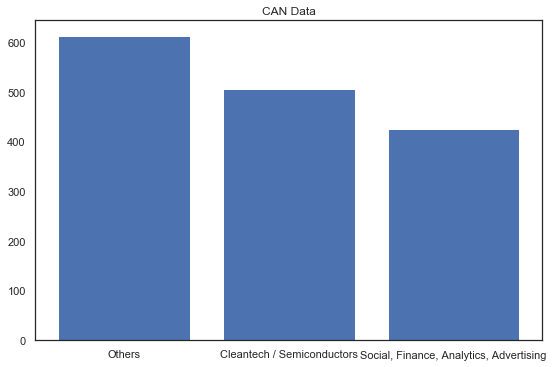

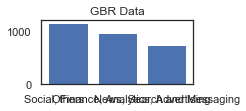

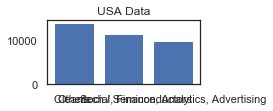

In [620]:
x = usa_top_3_df['main_sector']
y = usa_top_3_df['permalink']

# initiate a new figure explicitly 
plt.figure(figsize=[20,20])

# Create a subplot with 1 row, 3 columns 


x2 = can_top_3_df['main_sector']
y2 = can_top_3_df['permalink']
# create the second subplot in figure 1
plt.subplot(321)
plt.title("CAN Data")
plt.bar(x2, y2)
plt.show()

# create the first subplot in figure 1 
x1 = gbr_top_3_df['main_sector']
y1 = gbr_top_3_df['permalink']
# create the second subplot in figure 1
plt.subplot(322)
plt.title("GBR Data")
plt.bar(x1, y1)
plt.show()



plt.subplot(323)     # equivalent to plt.subplot(1, 2, 1)
plt.title("USA Data")
plt.bar(x, y)
plt.show()





